# Task 1: Loading the Data and Libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
iris_ds = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
iris_ds.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
iris_ds.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

#Removing rows where all columns are blank

iris_ds.dropna(how='all', inplace=True)
iris_ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length    149 non-null float64
sepal_width     149 non-null float64
petal_length    149 non-null float64
petal_width     149 non-null float64
species         149 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# Task 2: Visualize the Data

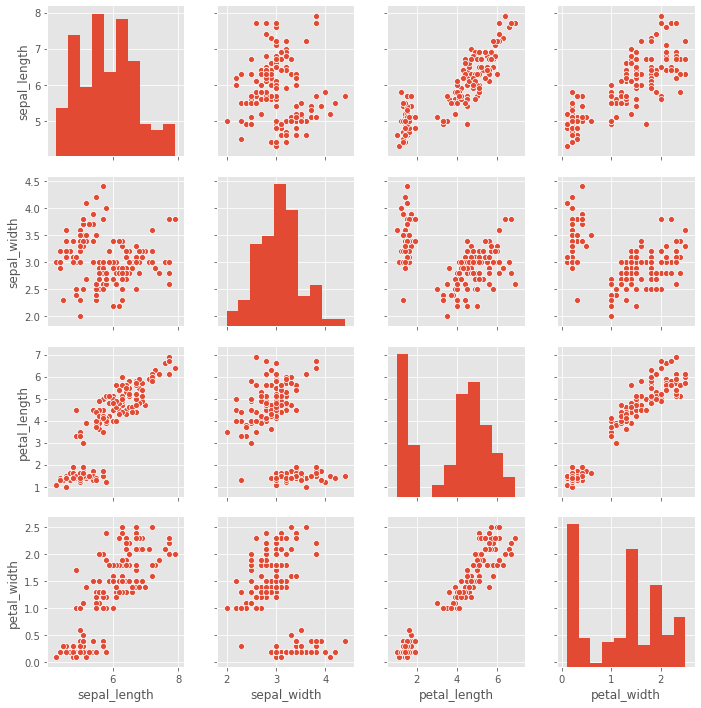

In [6]:
#Lets first get a detailed view of all the columns, along with their behaviour w.r.t. our Dependent Variable - species
sns.pairplot(iris_ds)

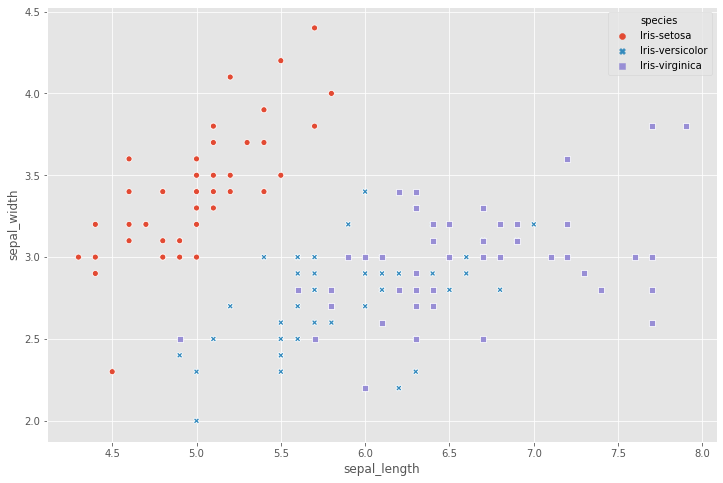

In [7]:
#For a detailed view
sns.scatterplot(x=iris_ds.sepal_length, y=iris_ds.sepal_width, hue=iris_ds.species, style=iris_ds.species)

Thus we can see that though iris-setosa is clearly separable, iris-versicolor and iris-virginica can't be classified distinctly. 
We'll try projecting them onto a smaller dimensional space to see if that improves the variance between the points.

The first step before starting with application of PCA, is to normalize the data

# Task 3: Standardize the Data

In [9]:
#Before scaling our data, let's separate it into feature space and target variable, since we only need to scale our featureset

X = iris_ds.iloc[:, 0:4].values
y = iris_ds.species.values

In [10]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
print(X)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

# Task 4: Computing Eigenvectors and Eigenvalues

PCA aims to find linearly uncorrelated orthogonal axes, also known as principal components in this n-dimensional data space.

Our aim is to project our features on these principal components.

Principal Components, for square, symmetric matrices can be determined by Eigendecomposition.
Eigendecomposition, in a nutshell, involves creating a Covariance Matrix, formula for which is shown below - 


Since our covariance matrix, is a square, symmetric matrix (since covariance of (1,3) and (3,1) would be the same), we can use Eigendecomposition to find the Eigenvectors and Eigenvalues

In [11]:
covariance_matrix = np.cov(X.T)
print(covariance_matrix)

[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


Eigendecomposition of this covariance matrix, gives us the Eigenvectors and Eigenvalues due to the below relation - 


In [12]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors: \n", eigenvectors)
print("Eigenvalues: \n", eigenvalues)

Eigenvectors: 
 [[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]
Eigenvalues: 
 [2.92442837 0.93215233 0.14946373 0.02098259]


Alternatively, for non-symmetric, non-square matrices, we can use another method - Singular Value Decomposition to find the Eigenvectors and Eigenvalues, needed for determining the Principal Components.

# Task 5: Singular Value Decomposition (SVD)

Just to understand, we will also compute our eigenvectors and eigenvalues using SVD here.

SVD's return value consists of the eigenvectors, the matrix of sum of length projections (square of which gives our eigenvalues), and the matrix of decomposition axes

In [13]:
eigenvectors_svd, s, v = np.linalg.svd(X.T)
eigenvectors_svd

array([[-0.52308496, -0.36956962,  0.72154279,  0.26301409],
       [ 0.25956935, -0.92681168, -0.2411952 , -0.12437342],
       [-0.58184289, -0.01912775, -0.13962963, -0.80099722],
       [-0.56609604, -0.06381646, -0.63380158,  0.52321917]])

# Task 6: Picking Principal Components using the Explained Variance

In [16]:
#Let's print our eigenvalues
print(eigenvalues)

[2.92442837 0.93215233 0.14946373 0.02098259]


Now how we choose our Principal Components, depends on the way we sort our Eigenvalues.

We will first sort the calculated eigenvalues in a descending order, and then pick the top k eigenvalues using explained variance

Further, we want to assess how much of variance in our data is explained by each of these Principal Components and also look at the variance explained cumulatively.

This assessment and interpretation is application or context based. For example if the transformed data is to be fed to a classifier for classification of target variable, you'd probably want your Principal Components to explain 90-95% of the data

In [29]:
#Now let's find the variance explained by each of our eigenvalues
variance_explained = [(i/sum(eigenvalues))*100 for i in eigenvalues]
variance_explained

[72.62003332692029, 23.147406858644153, 3.711515564584534, 0.5210442498510144]

In [31]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

Text(0.5, 1.0, 'Explained Variance vs Number of components')

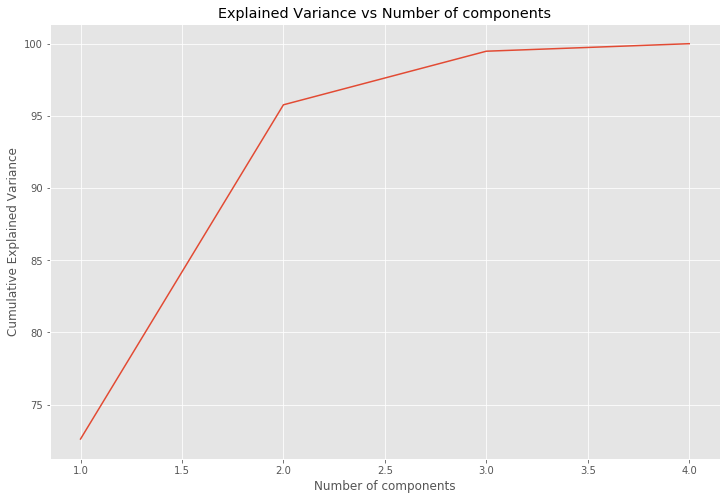

In [33]:
#Plotting this cumulative variance for visual depiction
sns.lineplot(x=[1,2,3,4], y=cumulative_variance_explained)
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of components')

We'll cutoff our Principal Component on an Explained Variance of >95%, thereby chosing the first 2 eigenvalues, and thus the first 2 eigenvectors as our Principal Components (axes for projecting our entire data upon)

# Task 7: Projecting data onto a Lower-Dimensional Linear Subspace

Since we had decided the cutoff to be 95%, and thus chose the first 2 eigenvalues, we will take the first 2 columns of the calculated eigenvector matrix (since the first 2 columns correspond to the first 2 eigenvalues) as our Projection Matrix

In [34]:
eigenvectors

array([[ 0.52308496, -0.36956962, -0.72154279,  0.26301409],
       [-0.25956935, -0.92681168,  0.2411952 , -0.12437342],
       [ 0.58184289, -0.01912775,  0.13962963, -0.80099722],
       [ 0.56609604, -0.06381646,  0.63380158,  0.52321917]])

In [43]:
projection_matrix = eigenvectors.T[:2].T
print(projection_matrix)

[[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


Now, formula for the transformed dataset, Xpca is given as:

**Xpca = X.W** (where W is the projection_matrix)

In [44]:
Xpca = X.dot(projection_matrix)

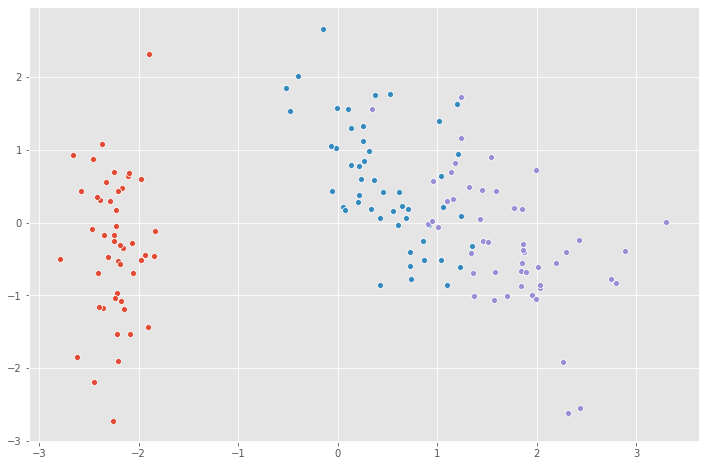

In [53]:
for species in (np.unique(y)):
    sns.scatterplot(Xpca[y==species, 0], Xpca[y==species, 1])

Thus, we got a good, disparate scatter plot for our data in the 2 features, and due to dimensionality reduction clusters got even more separated which can help in classification.